R2 Score: 0.1881


C:\Users\pisan\AppData\Local\Temp\ipykernel_39508\1564049057.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=importance, palette='viridis')


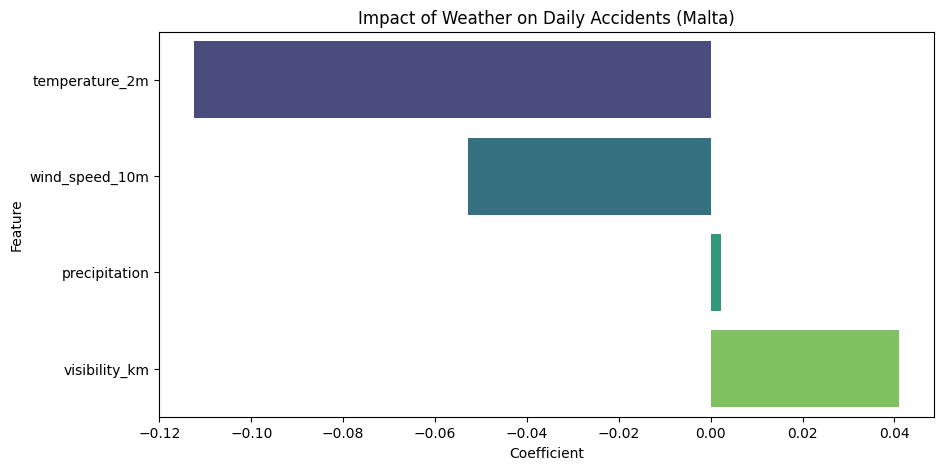

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

#load - the encoding was needed as it gave errors without
df = pd.read_csv('police_weather_data_km.csv', encoding='unicode_escape')

#using group by to be able to identify multiple accidents on a day
#convert column 'date' to date part only (could have used date_published instead)
df['only_date'] = pd.to_datetime(df['date']).dt.date

#group accidents into daily counts
daily_data = df.groupby('only_date').agg({
    'temperature_2m': 'mean',
    'precipitation': 'mean',
    'wind_speed_10m': 'mean',
    'visibility_km': 'mean',
    'date': 'count' # This counts how many accidents happened that day
}).rename(columns={'date': 'accident_count'})

#feature selection
#opted for precipitation from the 3 rain-related items since rain was pretty much 0, and showers almost identical to precipitation
features = ['temperature_2m', 'precipitation', 'wind_speed_10m', 'visibility_km']
X = daily_data[features]
y = daily_data['accident_count']

#apply scaling
#linear regression works better when all numbers are in a similar range
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#training the model 80/20
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

#evaluation
predictions = model.predict(X_test)
print(f"R2 Score: {r2_score(y_test, predictions):.4f}")

#feature importance chart
importance = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
importance = importance.sort_values(by='Coefficient')
plt.figure(figsize=(10,5))
sns.barplot(x='Coefficient', y='Feature', data=importance, palette='viridis')
plt.title('Impact of Weather on Daily Accidents (Malta)')
plt.show()

In [21]:
df = pd.read_csv('data/police_press_releases_full_enriched.csv', encoding='unicode_escape')

#using group by to be able to identify multiple accidents on a day
#convert column 'date' to date part only (could have used date_published instead)
df['only_date'] = pd.to_datetime(df['date_published']).dt.date

In [16]:
df.columns

Index(['title', 'date_published', 'date_modified', 'content', 'road', 'town',
       'location', 'all_text', 'fatalities_mentioned', 'fatalities_count',
       'vehicles', 'accident_types', 'hospital', 'injuries', 'brands', 'day',
       'time', 'age', 'latitude', 'longitude', 'hourly_temperature_2m',
       'hourly_precipitation', 'hourly_rain', 'hourly_showers',
       'hourly_visibility', 'hourly_windspeed_10m', 'hourly_winddirection_10m',
       'daily_weather_code', 'daily_rain_sum', 'daily_wind_gusts_10m_max',
       'daily_wind_speed_10m_max', 'daily_wind_direction_10m_dominant',
       'weather_matched_hour_utc', 'only_date', 'visibility_km'],
      dtype='object')

R2 Score: -2.6250


C:\Users\pisan\AppData\Local\Temp\ipykernel_39508\3936291360.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=importance, palette='viridis')


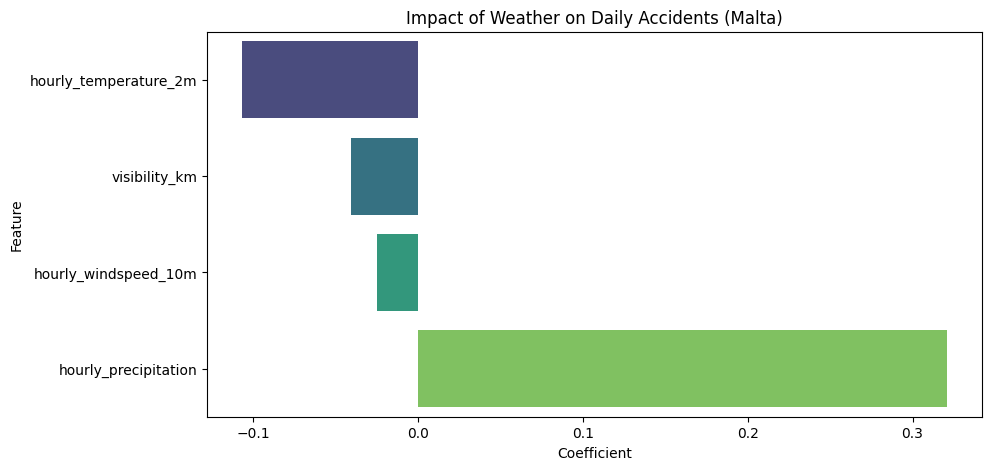

In [25]:
df['visibility_km'] = df['hourly_visibility'] / 1000

#group accidents into daily counts
daily_data = df.groupby('only_date').agg({
    'hourly_temperature_2m': 'mean',
    'hourly_precipitation': 'mean',
    'hourly_windspeed_10m': 'mean',
    'visibility_km': 'mean',
    'only_date': 'count' # This counts how many accidents happened that day
}).rename(columns={'only_date': 'accident_count'})
#feature selection
#opted for precipitation from the 3 rain-related items since rain was pretty much 0, and showers almost identical to precipitation
features = ['hourly_temperature_2m', 'hourly_precipitation', 'hourly_windspeed_10m', 'visibility_km']
X = daily_data[features]
y = daily_data['accident_count']

#apply scaling
#linear regression works better when all numbers are in a similar range
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#training the model 80/20
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

#evaluation
predictions = model.predict(X_test)
print(f"R2 Score: {r2_score(y_test, predictions):.4f}")

#feature importance chart
importance = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
importance = importance.sort_values(by='Coefficient')
plt.figure(figsize=(10,5))
sns.barplot(x='Coefficient', y='Feature', data=importance, palette='viridis')
plt.title('Impact of Weather on Daily Accidents (Malta)')
plt.show()

In [4]:
daily_data.sort_values(by='accident_count', ascending=False).head(10)

,temperature_2m,precipitation,wind_speed_10m,visibility_km,accident_count
only_date,,,,,
2025-02-09,12.647833,0.30,16.641794,8.926667,3
2024-12-14,16.339500,0.00,17.393021,33.420000,2
2024-12-11,15.714500,0.00,3.337599,65.660000,2
2024-12-22,14.189500,0.00,17.081263,69.240000,2
2024-12-27,13.839500,0.05,11.860602,41.030000,2
2025-01-07,14.289500,0.00,14.024089,18.910000,2
2024-12-19,15.539501,0.00,19.079923,53.380000,2
2025-02-21,13.039500,0.00,10.700730,28.450000,2
2025-01-15,11.839500,0.35,8.162561,26.740000,2


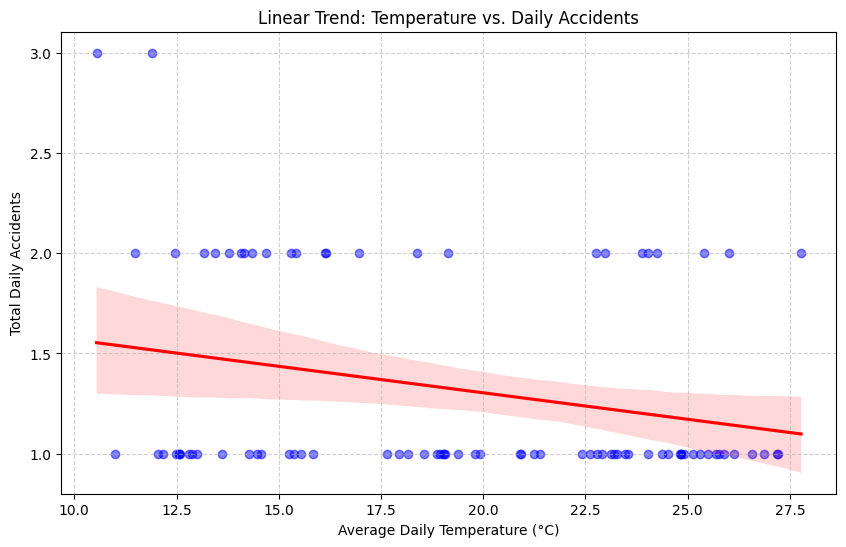

In [27]:
#plot showing the trend between temperature and accidents
plt.figure(figsize=(10, 6))
sns.regplot(x=daily_data['hourly_temperature_2m'], y=daily_data['accident_count'], 
            scatter_kws={'alpha':0.5, 'color':'blue'}, 
            line_kws={'color':'red'})

plt.title('Linear Trend: Temperature vs. Daily Accidents')
plt.xlabel('Average Daily Temperature (°C)')
plt.ylabel('Total Daily Accidents')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

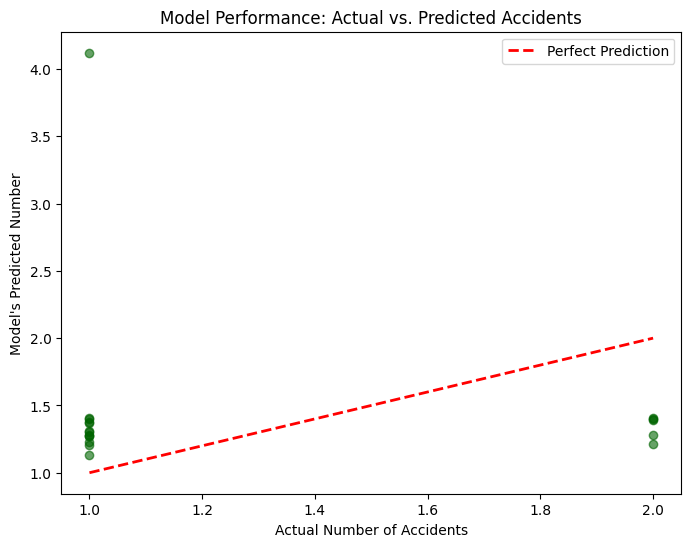

In [28]:
#create comparison plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6, color='darkgreen')

#add the identity line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='--', lw=2, label='Perfect Prediction')

plt.title('Model Performance: Actual vs. Predicted Accidents')
plt.xlabel('Actual Number of Accidents')
plt.ylabel('Model\'s Predicted Number')
plt.legend()
plt.show()

In [29]:
#mean,max,min of accidents
daily_data['accident_count'].describe()

count    87.000000
mean      1.321839
std       0.517019
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: accident_count, dtype: float64

In [30]:
predictions = model.predict(X_test)

print("--- MODEL PERFORMANCE ---")
print(f"R2 Score: {r2_score(y_test, predictions):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, predictions):.4f}")
print("-------------------------")

--- MODEL PERFORMANCE ---
R2 Score: -2.6250
Mean Squared Error (MSE): 0.7272
-------------------------
